# Using and understanding Task Graphs

In [1]:
from dask import delayed, compute

@delayed
def do_something_1(x, y):
    return x + y + 2*x*y

@delayed
def do_something_2(a, b):
    return a**3 - b**3

@delayed
def do_something_3(p, q):
    return p*p + q*q

len_arr = 3
x = [i*2 for i in range(1, len_arr+1)]
y = [i*3 for i in range(1, len_arr+1)]
z = [i*10 for i in range(1, len_arr+1)]

final_result = []

final_result = []
for i in range(0, len(x)):
    res_1 = do_something_1(x[i], y[i])
    res_2 = do_something_2(y[i], z[i])
    res_3 = do_something_3(res_1, res_2)
    final_result.append(res_3)

final_sum = delayed(sum)(final_result)

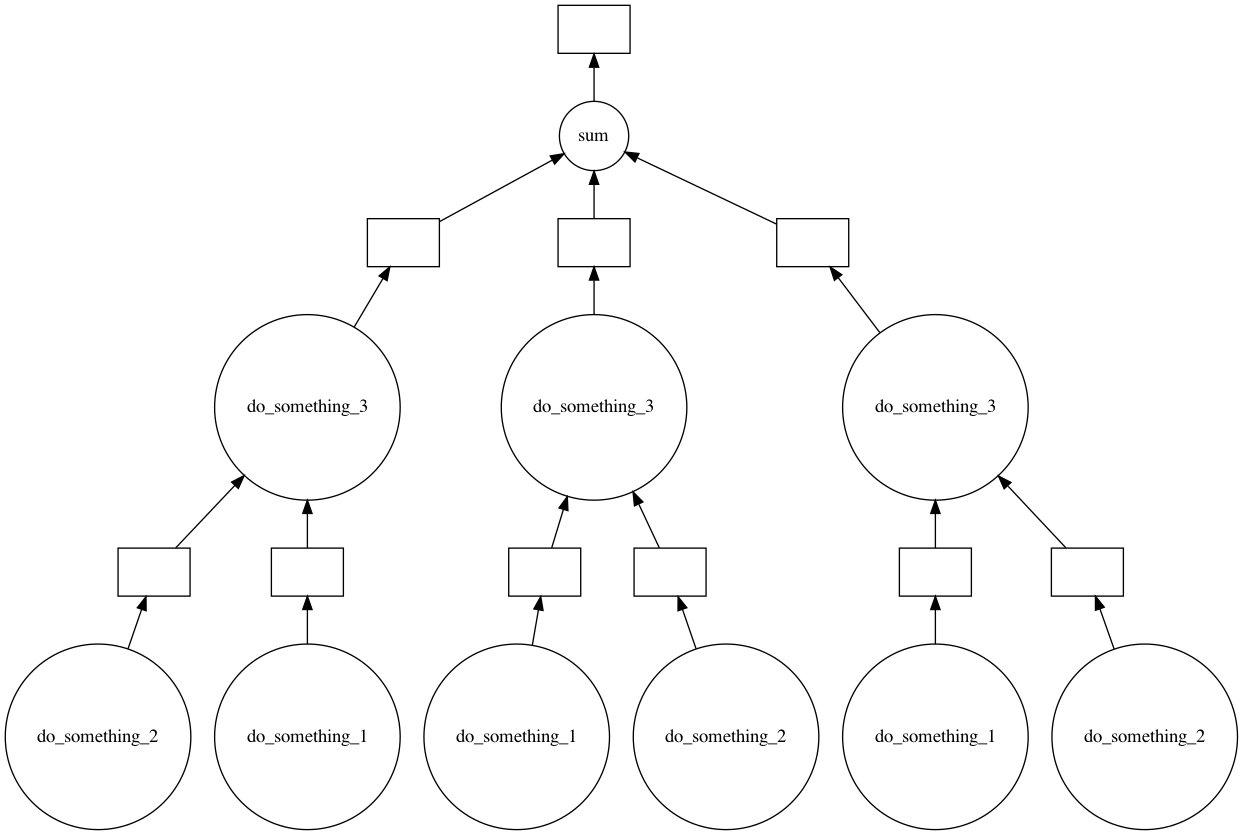

In [2]:
final_sum.visualize()

We can see the tasks in the above DAG are independant one from the other.

Chunks are ((3, 3, 3, 3, 3),)


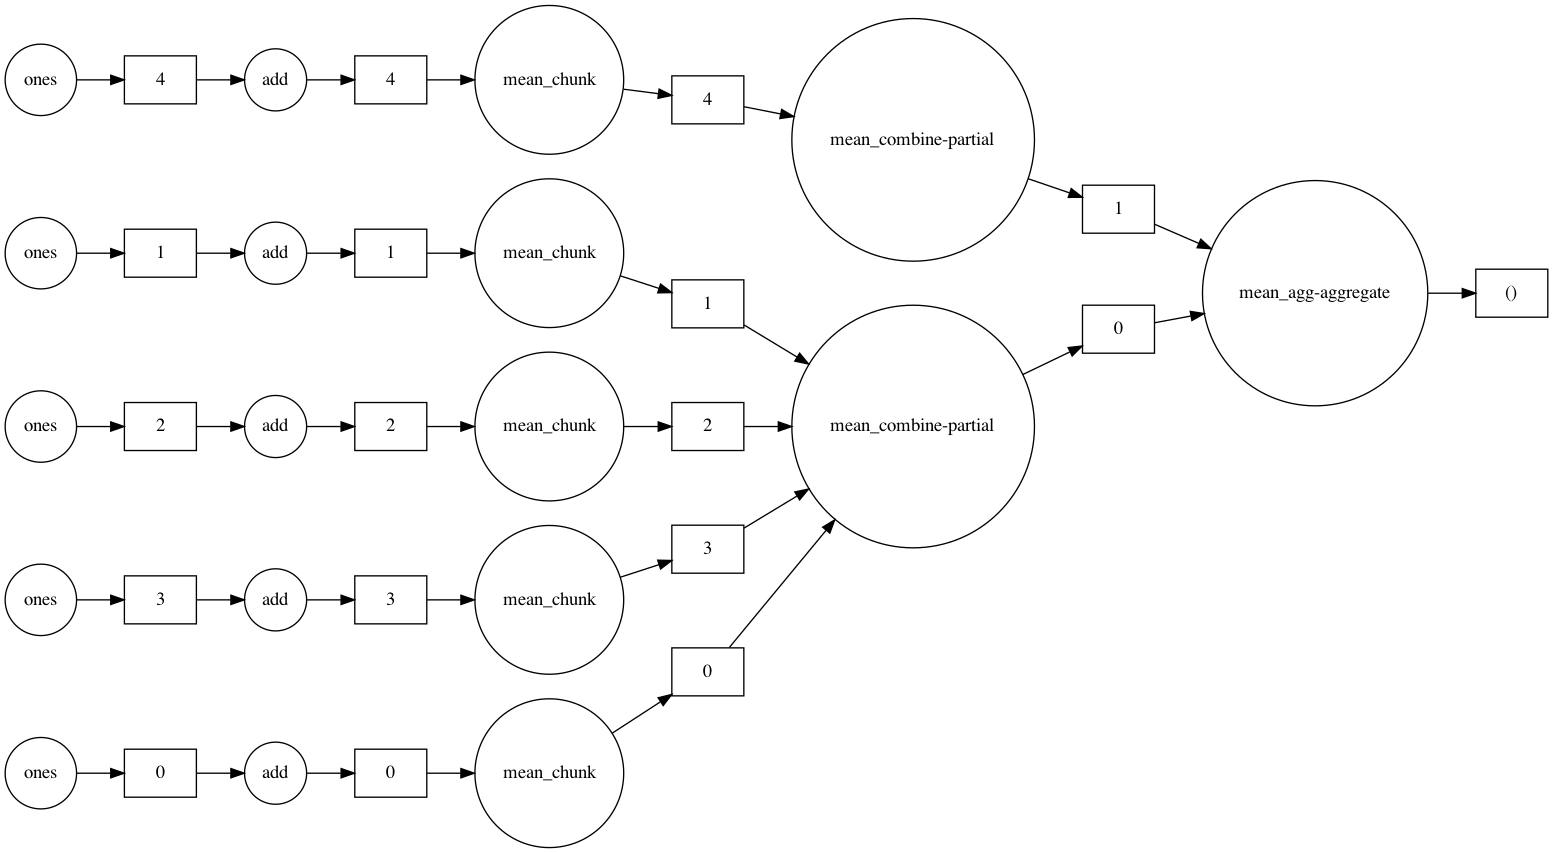

In [3]:
import dask.array as da

arr1 = da.ones(15, chunks=3)
arr2 = da.ones(15, chunks=3)

print("Chunks are {}".format(arr1.chunks))
sum_arr = da.add(arr1, arr2)
mean_arr = da.mean(sum_arr)

mean_arr.visualize(rankdir="LR")

This graph is a bit more complex. Mean is calculated for each chunk. Then partial means are combined. Finally they are aggregated to get final mean.

In [4]:
arr1.chunks

((3, 3, 3, 3, 3),)

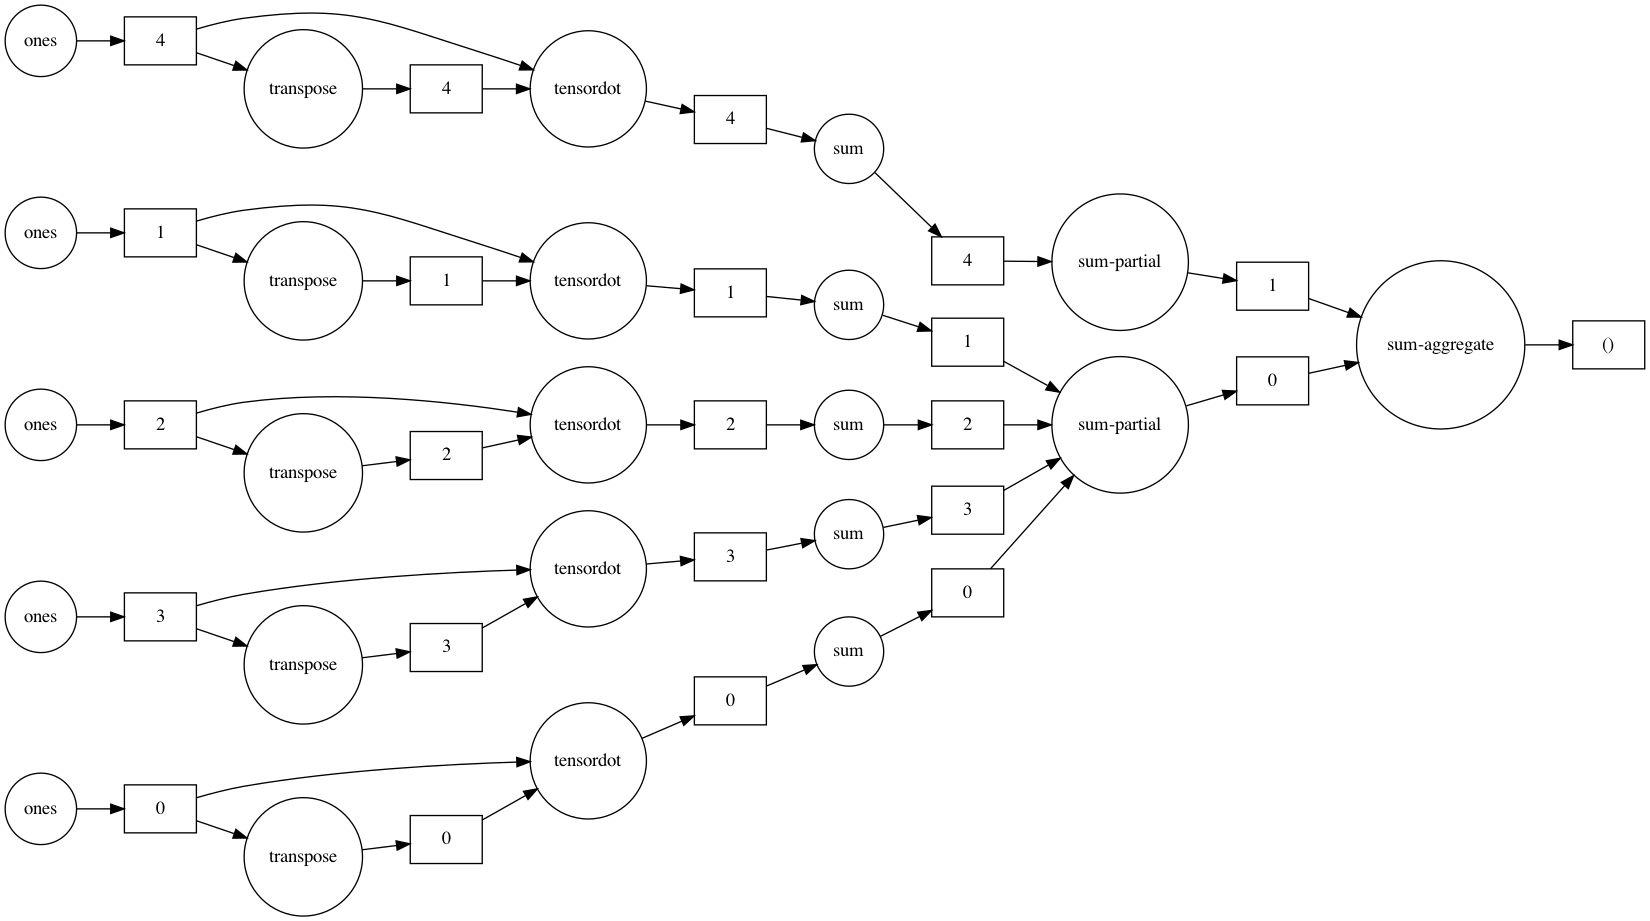

In [5]:
da.dot(arr1.T, arr2).visualize(rankdir="LR")

## Creating your own task graphs

In [6]:
def do_something_1(x, y):
    return x + y + 2*x*y

def do_something_2(a, b):
    return a**3 - b**2

def do_something_3(p, q):
    return p*p + q*q

def do_something_4(x):
    return x * 3



In [7]:
dsk = {
        'thrice_1': (do_something_4, 10),
        'thrice_2': (do_something_4, 20),
        'thrice_3': (do_something_4, 30),
        'thrice_4': (do_something_4, 40),
        'square_sum': (do_something_3,
                       'thrice_1', 'thrice_2'),
        'a_plus_b_wholeSquare': (do_something_1,
                                 'square_sum', 'thrice_3'),
        'some_complex_stuff': (do_something_2,
                               'thrice_4', 'a_plus_b_wholeSquare')}

In [8]:
from dask.multiprocessing import get
my_task = get(dsk, 'some_complex_stuff')

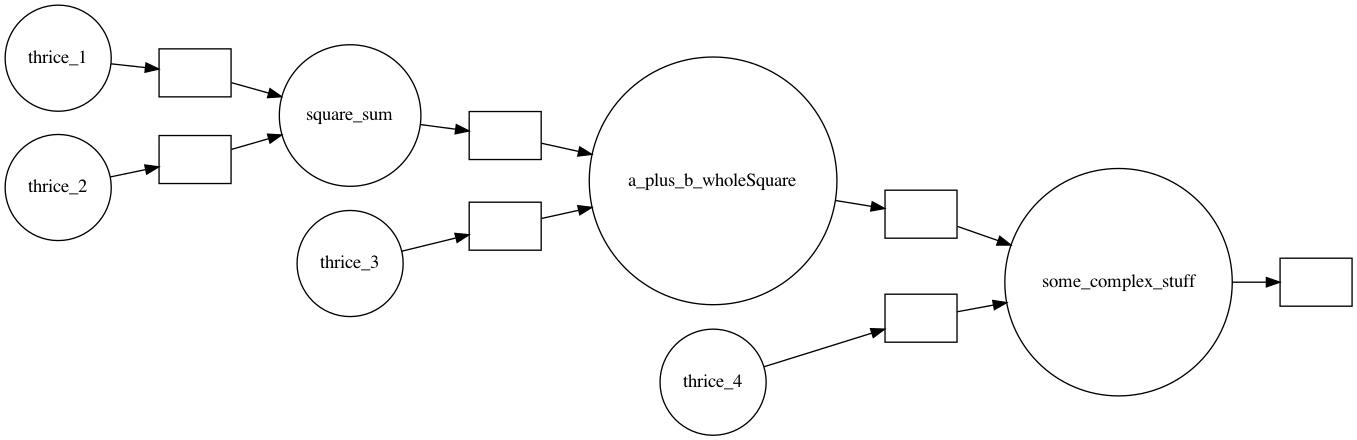

In [9]:
import dask
dask.visualize(dsk, rankdir="LR")

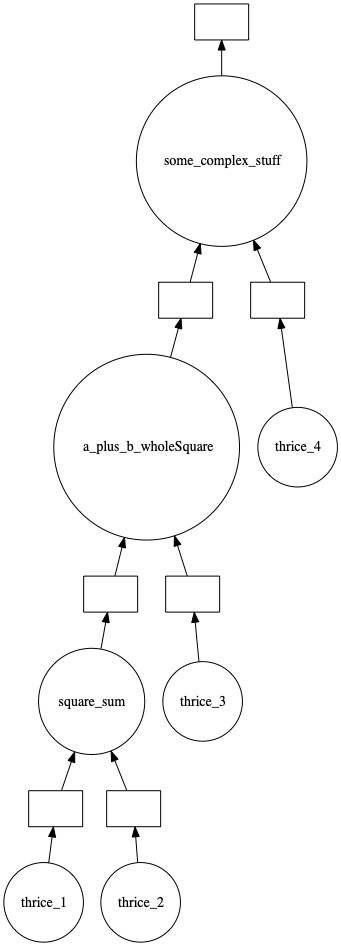

In [10]:
# visualize and store the task graph in a local jpg file
dask.visualize(dsk, filename='./task_graph.jpeg')